# Spotify song attribute
- import dataset
- EDA to visualize data
- train a classifier (decision tree)
- predict target using the trained classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

#%matplotlib inline

In [2]:
spotifyData = pd.read_csv("spotify_data.csv")

In [3]:
type(spotifyData)

pandas.core.frame.DataFrame

In [4]:
spotifyData.shape

(2017, 17)

In [5]:
spotifyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


### Display first 5 rows

In [6]:
spotifyData.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### Perform some calculation

In [7]:
spotifyData.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### Shows floating point data

In [8]:
spotifyFloatData = spotifyData.select_dtypes(include=['float64'])
spotifyFloatData.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.01020,0.833,0.434,0.021900,0.1650,-8.795,0.4310,150.062,4.0,0.286
1,0.19900,0.743,0.359,0.006110,0.1370,-10.401,0.0794,160.083,4.0,0.588
2,0.03440,0.838,0.412,0.000234,0.1590,-7.148,0.2890,75.044,4.0,0.173
3,0.60400,0.494,0.338,0.510000,0.0922,-15.236,0.0261,86.468,4.0,0.230
4,0.18000,0.678,0.561,0.512000,0.4390,-11.648,0.0694,174.004,4.0,0.904
5,0.00479,0.804,0.560,0.000000,0.1640,-6.682,0.1850,85.023,4.0,0.264
6,0.01450,0.739,0.472,0.000007,0.2070,-11.204,0.1560,80.030,4.0,0.308
7,0.02020,0.266,0.348,0.664000,0.1600,-11.609,0.0371,144.154,4.0,0.393
8,0.04810,0.603,0.944,0.000000,0.3420,-3.626,0.3470,130.035,4.0,0.398
9,0.00208,0.836,0.603,0.000000,0.5710,-7.792,0.2370,99.994,4.0,0.386


### Shows Integer data

In [9]:
spotifyIntegerData = spotifyData.select_dtypes(include=['int64'])
spotifyIntegerData.head(10)

,Unnamed: 0,duration_ms,key,mode,target
0,0,204600,2,1,1
1,1,326933,1,1,1
2,2,185707,2,1,1
3,3,199413,5,1,1
4,4,392893,5,0,1
5,5,251333,8,1,1
6,6,241400,1,1,1
7,7,349667,10,0,1
8,8,202853,11,0,1
9,9,226840,7,1,1


In [10]:
# custom color
green_red = ['green', 'red']
palette = sns.color_palette(green_red)
sns.set_palette(palette)
sns.set_style('white')

### Count number of songs depends on tempo and mode (Positive & Negative)

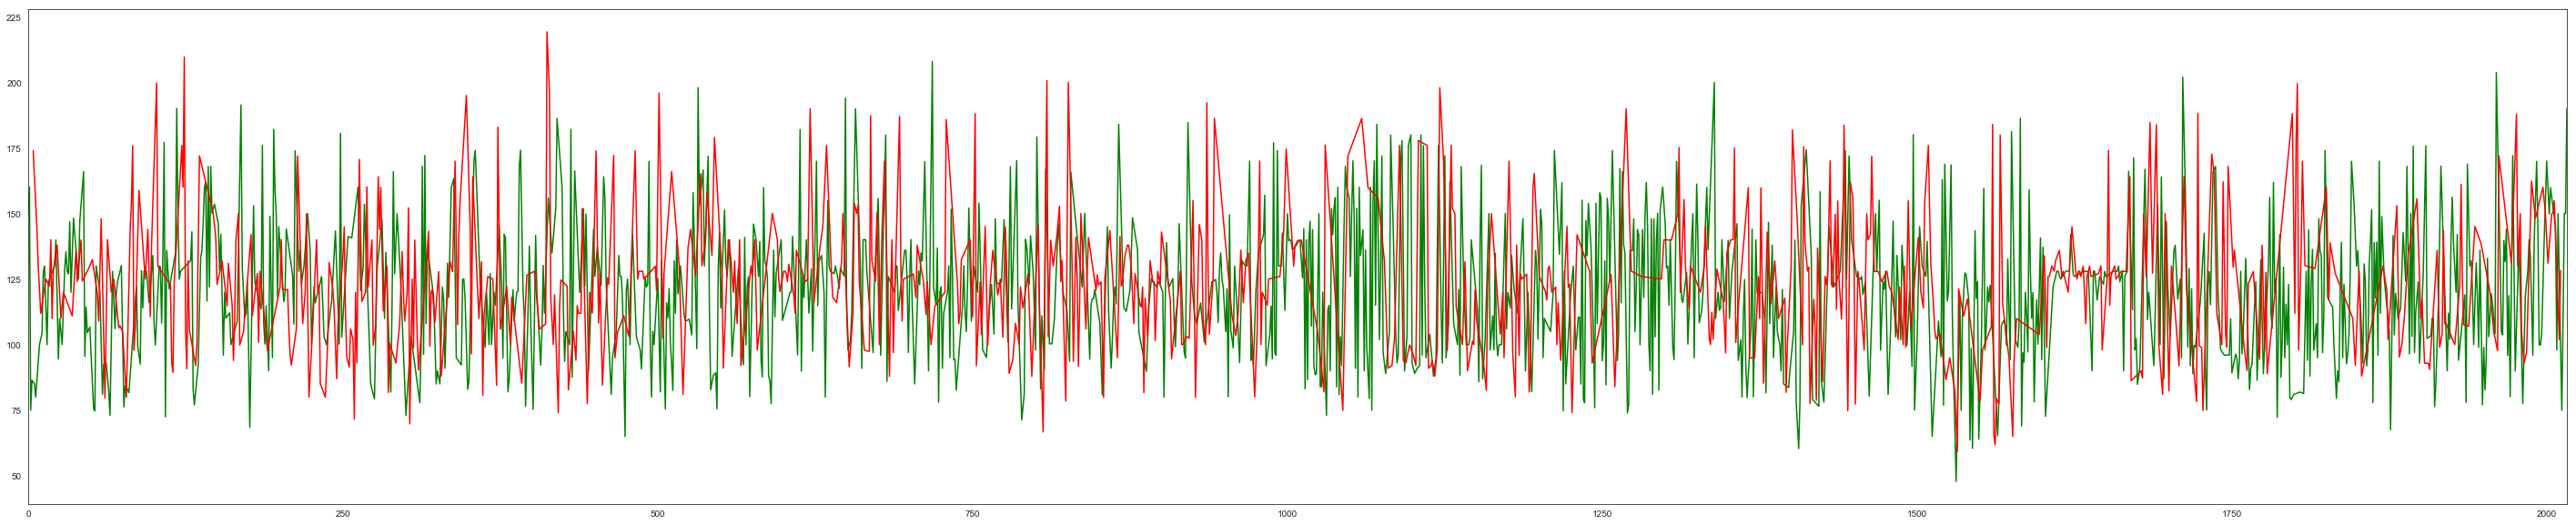

In [11]:
positiveTempo = spotifyData[spotifyData['mode'] == 1]['tempo']
negativeTempo = spotifyData[spotifyData['mode'] == 0]['tempo']
plt.figure(figsize=(50,10))
positiveTempo.plot()
negativeTempo.plot()

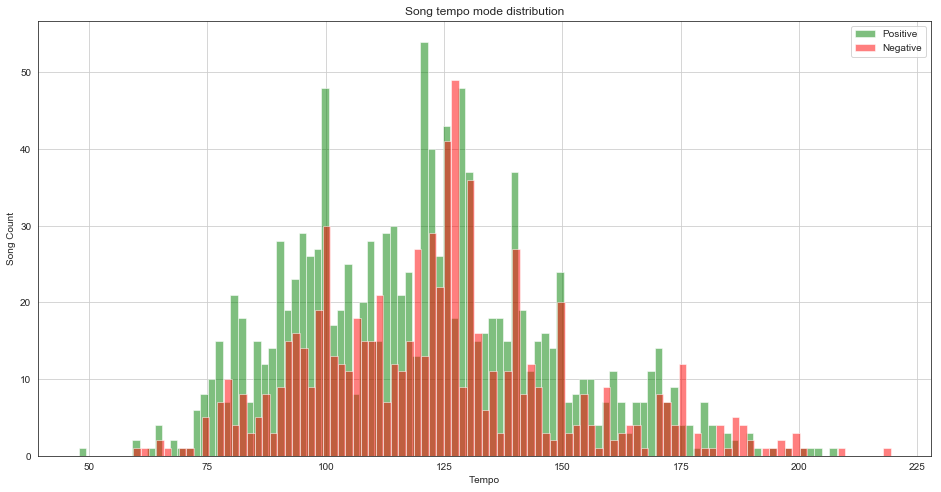

In [12]:
plt.figure(figsize=(16,8))
plt.title('Song tempo mode distribution')
plt.xlabel('Tempo')
plt.ylabel('Song Count')
positiveTempo.hist(bins=100, alpha=.5, label='Positive')
negativeTempo.hist(bins=100, alpha=.5, label='Negative')
plt.legend()

In [13]:
posAcousticness = spotifyData[spotifyData['mode'] == 1]['acousticness']
negAcousticness = spotifyData[spotifyData['mode'] == 0]['acousticness']
posDanceability = spotifyData[spotifyData['mode'] == 1]['danceability']
negDanceability = spotifyData[spotifyData['mode'] == 0]['danceability']
posDuration = spotifyData[spotifyData['mode'] == 1]['duration_ms']
negDuration = spotifyData[spotifyData['mode'] == 0]['duration_ms']
posEnergy = spotifyData[spotifyData['mode'] == 1]['energy']
negEnergy = spotifyData[spotifyData['mode'] == 0]['energy']
posInstru = spotifyData[spotifyData['mode'] == 1]['instrumentalness']
negInstru = spotifyData[spotifyData['mode'] == 0]['instrumentalness']
posKey = spotifyData[spotifyData['mode'] == 1]['key']
negKey = spotifyData[spotifyData['mode'] == 0]['key']
posLiveness = spotifyData[spotifyData['mode'] == 1]['liveness']
negLiveness = spotifyData[spotifyData['mode'] == 0]['liveness']
posLoudness = spotifyData[spotifyData['mode'] == 1]['loudness']
negLoudness = spotifyData[spotifyData['mode'] == 0]['loudness']
posTime = spotifyData[spotifyData['mode'] == 1]['time_signature']
negTime = spotifyData[spotifyData['mode'] == 0]['time_signature']
posValence = spotifyData[spotifyData['mode'] == 1]['valence']
negValence = spotifyData[spotifyData['mode'] == 0]['valence']
posTarget = spotifyData[spotifyData['mode'] == 1]['target']
negTarget = spotifyData[spotifyData['mode'] == 0]['target']

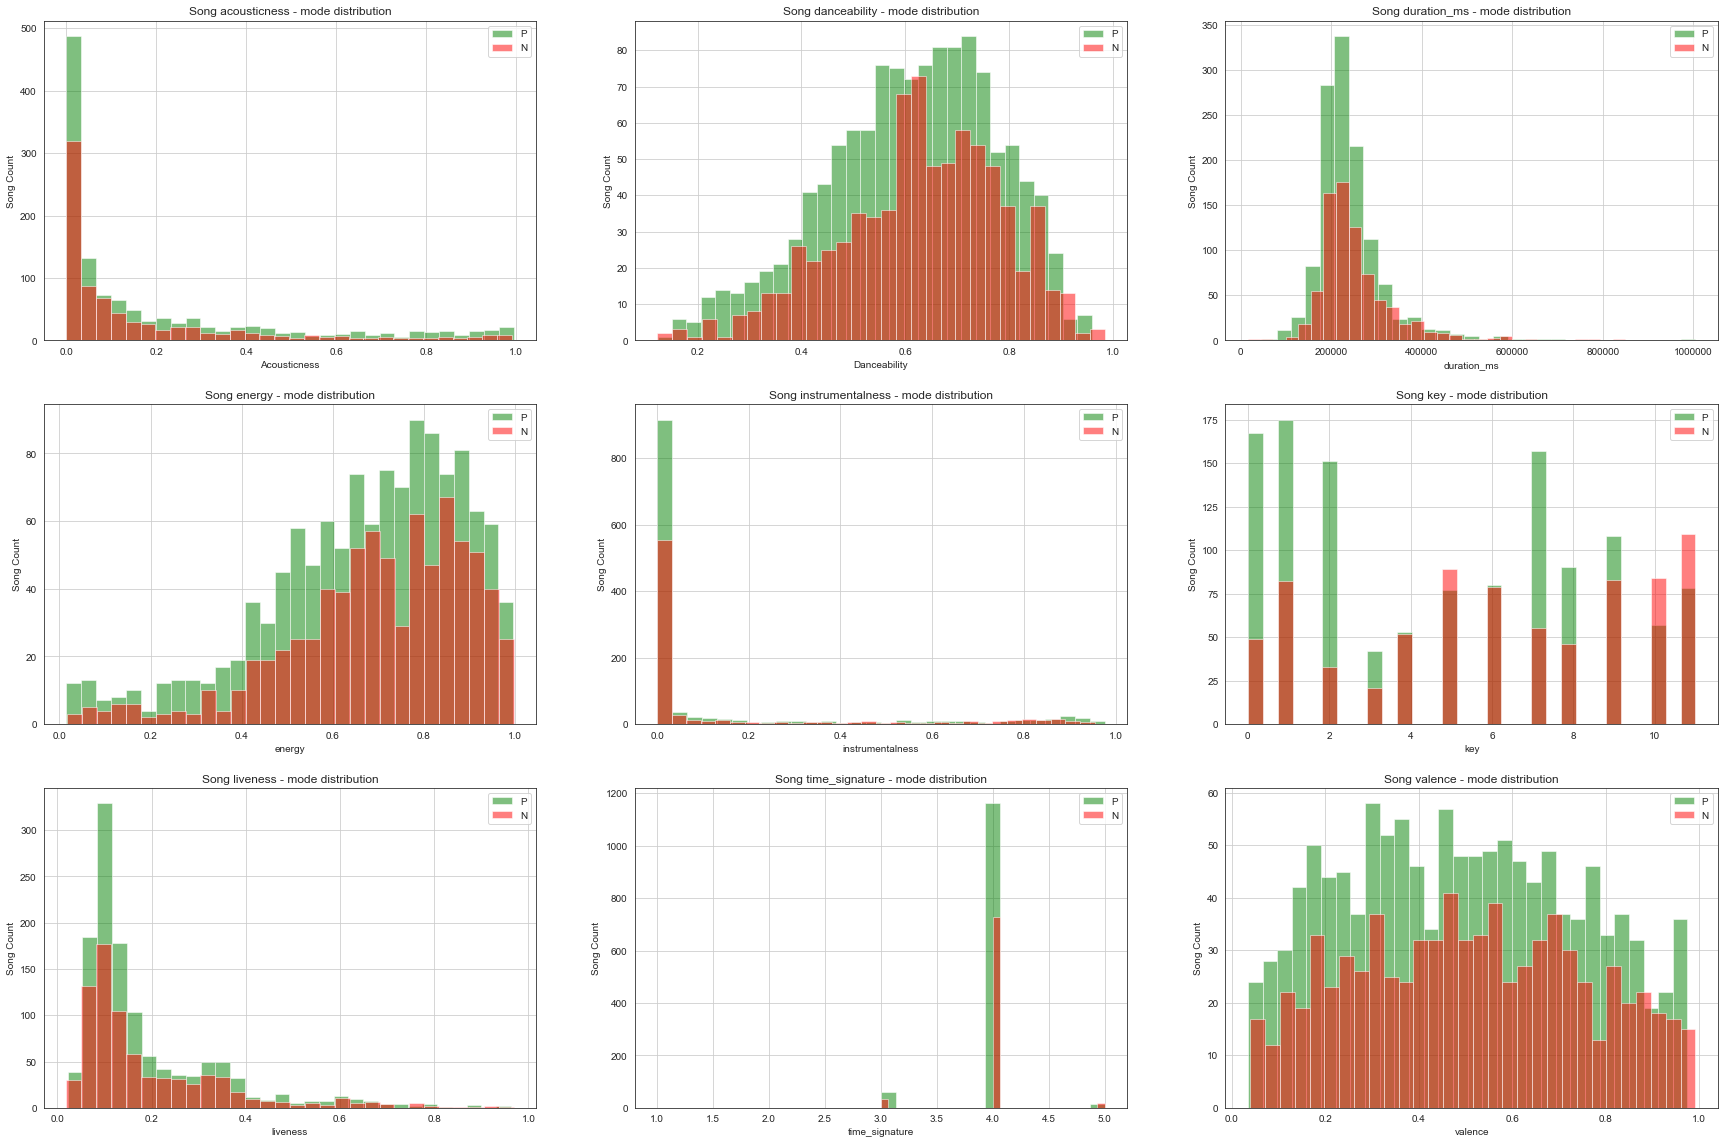

In [14]:
figSize = plt.figure(figsize=(30,20))

# acousticness
ax1 = figSize.add_subplot(331)
ax1.set_title('Song acousticness - mode distribution')
ax1.set_xlabel('Acousticness')
ax1.set_ylabel('Song Count')
posAcousticness.hist(bins=30, alpha=.5, label='P')
negAcousticness.hist(bins=30, alpha=.5, label='N')
ax1.legend()

# danceability
ax2 = figSize.add_subplot(332)
ax2.set_title('Song danceability - mode distribution')
ax2.set_xlabel('Danceability')
ax2.set_ylabel('Song Count')
posDanceability.hist(bins=30, alpha=.5, label='P')
negDanceability.hist(bins=30, alpha=.5, label='N')
ax2.legend()

# duration_ms
ax3 = figSize.add_subplot(333)
ax3.set_title('Song duration_ms - mode distribution')
ax3.set_xlabel('duration_ms')
ax3.set_ylabel('Song Count')
posDuration.hist(bins=30, alpha=.5, label='P')
negDuration.hist(bins=30, alpha=.5, label='N')
ax3.legend()

# energy
ax4 = figSize.add_subplot(334)
ax4.set_title('Song energy - mode distribution')
ax4.set_xlabel('energy')
ax4.set_ylabel('Song Count')
posEnergy.hist(bins=30, alpha=.5, label='P')
negEnergy.hist(bins=30, alpha=.5, label='N')
ax4.legend()

# instrumentalness
ax5 = figSize.add_subplot(335)
ax5.set_title('Song instrumentalness - mode distribution')
ax5.set_xlabel('instrumentalness')
ax5.set_ylabel('Song Count')
posInstru.hist(bins=30, alpha=.5, label='P')
negInstru.hist(bins=30, alpha=.5, label='N')
ax5.legend()

# key
ax6 = figSize.add_subplot(336)
ax6.set_title('Song key - mode distribution')
ax6.set_xlabel('key')
ax6.set_ylabel('Song Count')
posKey.hist(bins=30, alpha=.5, label='P')
negKey.hist(bins=30, alpha=.5, label='N')
ax6.legend()

# liveness
ax7 = figSize.add_subplot(337)
ax7.set_title('Song liveness - mode distribution')
ax7.set_xlabel('liveness')
ax7.set_ylabel('Song Count')
posLiveness.hist(bins=30, alpha=.5, label='P')
negLiveness.hist(bins=30, alpha=.5, label='N')
ax7.legend()

# time_signature
ax8 = figSize.add_subplot(338)
ax8.set_title('Song time_signature - mode distribution')
ax8.set_xlabel('time_signature')
ax8.set_ylabel('Song Count')
posTime.hist(bins=30, alpha=.5, label='P')
negTime.hist(bins=30, alpha=.5, label='N')
ax8.legend()

# valence
ax9 = figSize.add_subplot(339)
ax9.set_title('Song valence - mode distribution')
ax9.set_xlabel('valence')
ax9.set_ylabel('Song Count')
posValence.hist(bins=30, alpha=.5, label='P')
negValence.hist(bins=30, alpha=.5, label='N')
ax9.legend()

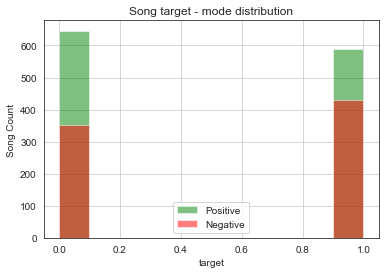

In [15]:
# target
plt.title('Song target - mode distribution')
plt.xlabel('target')
plt.ylabel('Song Count')
posTarget.hist(bins=10, alpha=.5, label='Positive')
negTarget.hist(bins=10, alpha=.5, label='Negative')
plt.legend()

In [16]:
train, test = train_test_split(spotifyData, test_size = 0.15)

In [17]:
print(f"Traing size = {len(train)}, Test size = {len(test)}")

Traing size = 1714, Test size = 303


In [18]:
train.shape

(1714, 17)